# 자연어 처리
## 1. 한글 자연어 처리 기초 - KoNLPy 및 필요 모듈 설치

 * KoNLPy 패키지 설치
     * 1. JDK 설치 : JAVA JDK로 검색해서 OS에 맞춰 설치
     * 2. KoNLPy 의존성 패키지 설치
         * **pip install jpype1**
     * 3. KoNLPy 설치
         * **pip install konlpy**
     * 4. (C:\Users\A\Anaconda3) C:\Users\Anaconda3>python3
         * import nltk
         * nltk.download()
             *  --> stopwords & punkt duble click download
     * 5. 워드 클라우드
         * **pip install wordcloud**
     * 6. gensim 설치
         * **pip install gensim**

# 2. 한글 자연어 처리 기초

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
from konlpy.tag import Kkma # 꼬꼬마 사전
kkma = Kkma()

In [3]:
kkma.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석']

In [4]:
kkma.sentences('한국어 분석을 시작합니다 재미있어요~~')

['한국어 분석을 시작합니다', '재미있어요~~']

In [5]:
kkma.pos('한국어 분석을 시작합니다 재미있어요~~')  # POS(part of speech) 형태소 품사

[('한국어', 'NNG'),
 ('분석', 'NNG'),
 ('을', 'JKO'),
 ('시작하', 'VV'),
 ('ㅂ니다', 'EFN'),
 ('재미있', 'VA'),
 ('어요', 'EFN'),
 ('~~', 'SW')]

In [6]:
from konlpy.tag import Hannanum
hannanum = Hannanum()

In [7]:
hannanum.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '시작']

In [8]:
hannanum.morphs('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '을', '시작', '하', 'ㅂ니다', '재미있', '어요', '~~']

In [9]:
# pos : 형태소 분석
hannanum.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'N'),
 ('분석', 'N'),
 ('을', 'J'),
 ('시작', 'N'),
 ('하', 'X'),
 ('ㅂ니다', 'E'),
 ('재미있', 'P'),
 ('어요', 'E'),
 ('~~', 'S')]

In [10]:
# 트위터 분석
from konlpy.tag import Okt
t = Okt()

In [11]:
t.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '시작']

In [12]:
t.morphs('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '을', '시작', '합니다', '재미있어요', '~~']

In [13]:
t.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'Noun'),
 ('분석', 'Noun'),
 ('을', 'Josa'),
 ('시작', 'Noun'),
 ('합니다', 'Verb'),
 ('재미있어요', 'Adjective'),
 ('~~', 'Punctuation')]

# 3. 워드 클라우드
 * WordCloud 설치 : pip install wordcloud
 * PIL(Python Imaging Library)

In [14]:
from wordcloud import WordCloud, STOPWORDS

import numpy as np
from PIL import Image

In [15]:
text = open('../../data/09. a_new_hope.txt').read()
alice_mask = np.array(Image.open('../../data/09. alice_mask.png'))
stopwords = set(STOPWORDS)
stopwords.add("said")

In [16]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False   # - 기호 깨지는 것 방지
# f_path = "/Library/Fonts/AppleGothic.ttf"   -> MAC
f_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

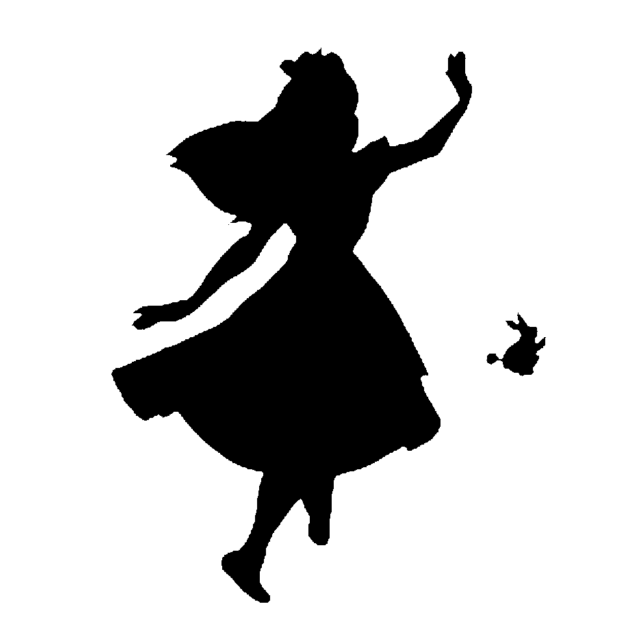

In [17]:
plt.figure(figsize=(8,8))
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear') # Reds
plt.axis('off')
plt.show()

In [18]:
wc = WordCloud(background_color='white', max_words=2000,
               mask=alice_mask, stopwords=stopwords)
wc = wc.generate(text) # 엘리스라는 문서에서 단어를 뽑아옴
wc.words_

{'Luke': 1.0,
 'HAN': 0.49053030303030304,
 'DEATH STAR': 0.42424242424242425,
 'THREEPIO': 0.3977272727272727,
 'Ben': 0.2897727272727273,
 'Leia': 0.21401515151515152,
 'ship': 0.21401515151515152,
 'Artoo': 0.1875,
 'one': 0.18181818181818182,
 'X WING': 0.17992424242424243,
 'look': 0.17424242424242425,
 'RED LEADER': 0.16856060606060605,
 'back': 0.1553030303030303,
 'move': 0.14772727272727273,
 'two': 0.14583333333333334,
 'toward': 0.14015151515151514,
 'going': 0.13825757575757575,
 'Biggs': 0.13068181818181818,
 'INT DEATH': 0.12878787878787878,
 'TIE fighter': 0.12878787878787878,
 'see': 0.1268939393939394,
 'EXT SPACE': 0.1268939393939394,
 'Vader': 0.125,
 'MILLENNIUM FALCON': 0.12121212121212122,
 'right': 0.11742424242424243,
 'LUKE X': 0.11742424242424243,
 'come': 0.11553030303030302,
 'around': 0.11363636363636363,
 'trooper': 0.11363636363636363,
 'robot': 0.10795454545454546,
 'small': 0.10606060606060606,
 'side': 0.10416666666666667,
 'head': 0.10416666666666667,

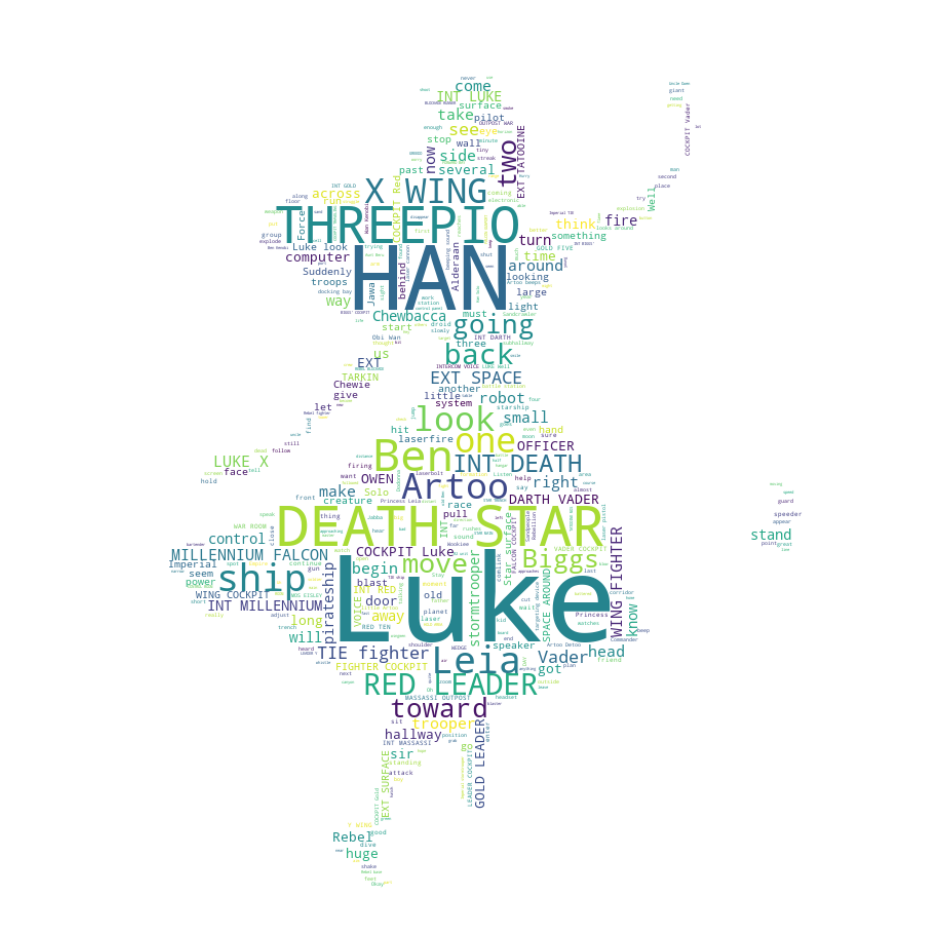

In [19]:
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [20]:
text = open('../../data/09. a_new_hope.txt').read()
text = text.replace('HAN', 'Han')
text = text.replace("LUKE'S", "Luke")
mask = np.array(Image.open('../../data/09. stormtrooper_mask.png'))

In [21]:
stopwords = set(STOPWORDS)
stopwords.add("int")
stopwords.add("ext")

In [22]:
wc = WordCloud(max_words=1000, random_state=1, margin=10,
               mask=mask, stopwords=stopwords).generate(text)
default_colors = wc.to_array()


In [23]:
wc.words_

{'Luke': 1.0,
 'Han': 0.45121951219512196,
 'DEATH STAR': 0.3902439024390244,
 'THREEPIO': 0.36585365853658536,
 'Ben': 0.2665505226480836,
 'Leia': 0.19686411149825783,
 'ship': 0.19686411149825783,
 'Artoo': 0.17247386759581881,
 'one': 0.1672473867595819,
 'X WING': 0.16550522648083624,
 'look': 0.1602787456445993,
 'RED LEADER': 0.15505226480836237,
 'back': 0.14285714285714285,
 'move': 0.13588850174216027,
 'two': 0.13414634146341464,
 'toward': 0.1289198606271777,
 'going': 0.12717770034843207,
 'Biggs': 0.12020905923344948,
 'TIE fighter': 0.11846689895470383,
 'see': 0.11672473867595819,
 'Vader': 0.11498257839721254,
 'MILLENNIUM FALCON': 0.11149825783972125,
 'SPACE': 0.10975609756097561,
 'surface': 0.10801393728222997,
 'right': 0.10801393728222997,
 'Luke X': 0.10801393728222997,
 'come': 0.10627177700348432,
 'around': 0.10452961672473868,
 'trooper': 0.10452961672473868,
 'robot': 0.09930313588850175,
 'small': 0.0975609756097561,
 'side': 0.09581881533101046,
 'head': 

In [24]:
import random
def grey_color_func(word, font_size, position, orientation, 
                   random_state=None, **kwargs):
    return 'hsl(0, 0%%, %d%%)' % random.randint(60,100) # hsl: 색상, 채도, 명도

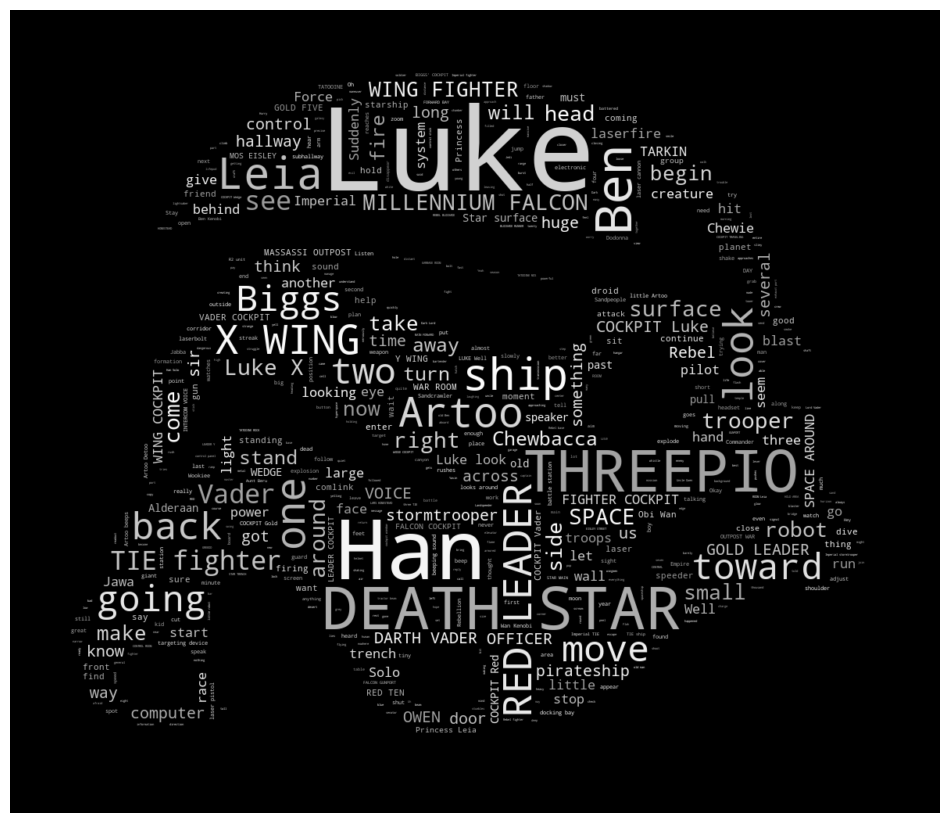

In [25]:
plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func=grey_color_func,random_state=3),
          interpolation='bilinear')
plt.axis('off')
plt.show()

## 육아휴직 관련 법안 1809890호

In [26]:
import nltk

In [27]:
from konlpy.corpus import kobill
files_ko = kobill.fileids()
doc_ko = kobill.open('1809890.txt').read()

In [28]:
# doc_ko

In [29]:
from konlpy.tag import Twitter
t = Twitter()
tokens_ko = t.nouns(doc_ko)
# tokens_ko

In [30]:
ko = nltk.Text(tokens_ko)

In [31]:
print(len(ko.tokens))
print(len(set(ko.tokens)))
ko.vocab()

735
250


FreqDist({'육아휴직': 38, '발생': 19, '만': 18, '이하': 18, '비용': 17, '액': 17, '경우': 16, '세': 16, '자녀': 14, '고용': 14, ...})

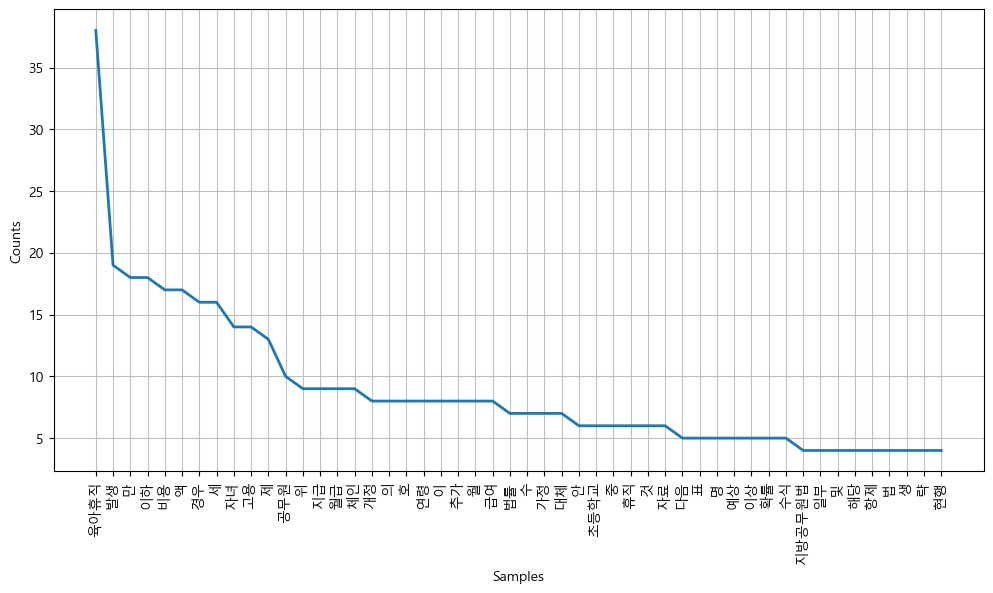

In [32]:
plt.figure(figsize=(12,6))
ko.plot(50)
plt.show()

In [33]:
# 불용어 처리
stop_words = ['.', '(', ')', ',', "'", '%', '-', 'X', ').', '×',
              '의','자','에','안','번','호','을','이','다','만',
              '로','가','를','발','인','액','수','세','중','제','월','곳',
             '위','이하','것','표','명', '및']

ko = [each_word for each_word in ko if each_word not in stop_words]
# ko

In [34]:
# stop_words

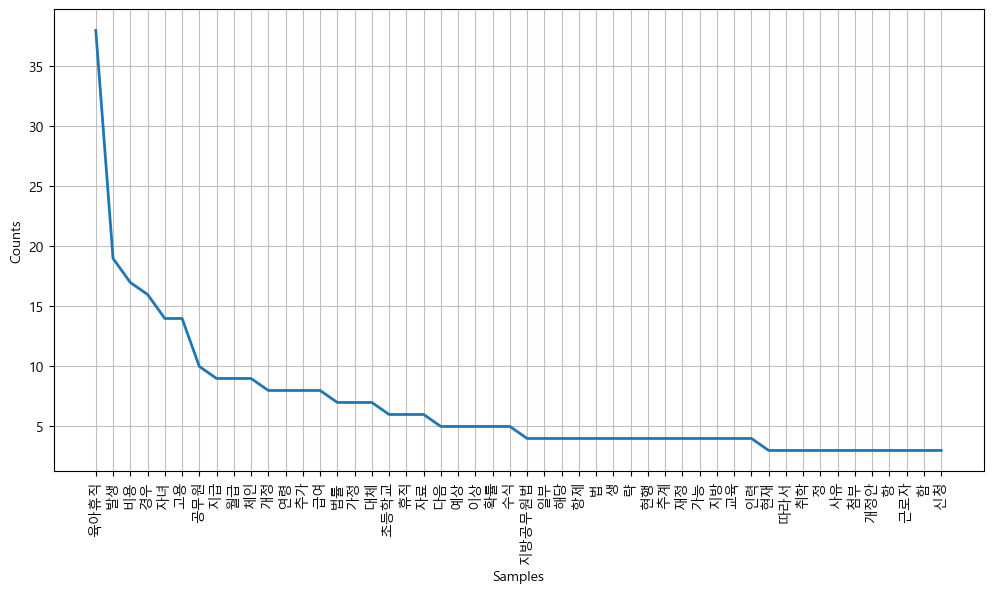

In [35]:
ko = nltk.Text(ko)
plt.figure(figsize=(12,6))
ko.plot(50)    #Plot sorted frequency of top 50 tokens
plt.show()

In [36]:
ko.count('초등학교')

6

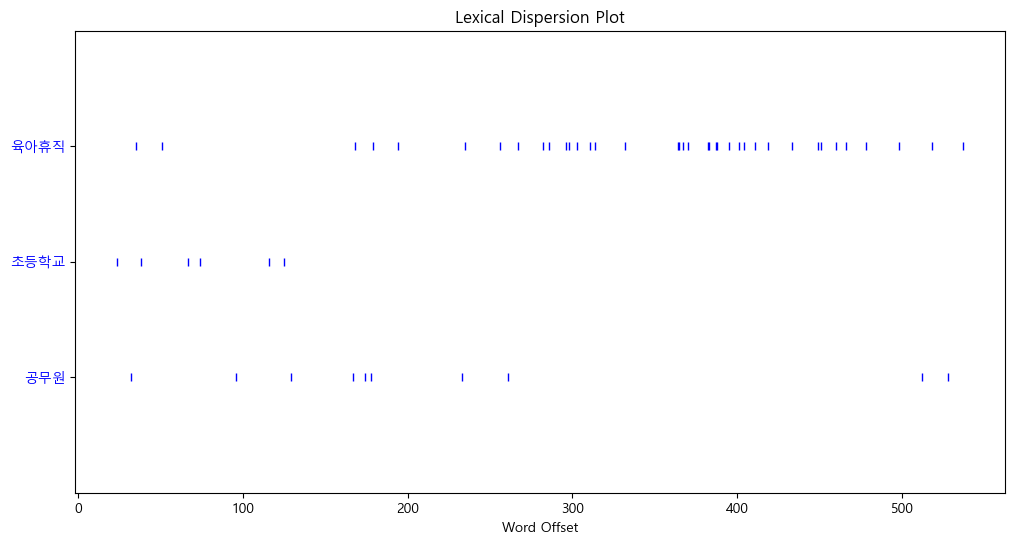

In [37]:
# 단어의 문장내 위치
plt.figure(figsize=(12,6))
ko.dispersion_plot(['육아휴직', '초등학교', '공무원'])

In [38]:
ko.concordance('초등학교')

Displaying 6 of 6 matches:
 여상규 안규백 황영철 박영아 김정훈 김학송 의원 제안 이유 내용 초등학교 저학년 경우 부모 사랑 필요 나이 현재 공무원 자녀 양육 육아휴직
 부모 사랑 필요 나이 현재 공무원 자녀 양육 육아휴직 자녀 나이 초등학교 저학년 자녀 해당 부모님 일자리 곧 출산 의욕 저하 문제 것임 따
률 지방공무원법 일부 개정 법률 지방공무원법 일부 다음 개정 항제 초등학교 취학 전 자녀 취학 중인 경우 초등학교 학년 말 자녀 부 칙 법 
원법 일부 다음 개정 항제 초등학교 취학 전 자녀 취학 중인 경우 초등학교 학년 말 자녀 부 칙 법 공포 날 시행 신 구조 문대비 현 행 개
 사유 직 임용 휴직 다만 경우 대통령령 정 사정 직 생 략 현행 초등학교 취 취학 중인 경우 학 전 자녀 양육 초등학교 학년 여 여자 공무
정 직 생 략 현행 초등학교 취 취학 중인 경우 학 전 자녀 양육 초등학교 학년 여 여자 공무원 말 자녀 임신 출산 때 생 략 생 략 현행 


In [39]:
# ko.collocations()  문장 내에서 연이어 나타난다
ko.collocation_list()

[('초등학교', '저학년'),
 ('공무원', '근로자'),
 ('근로자', '육아휴직'),
 ('대상자', '육아휴직'),
 ('육아휴직', '대상자'),
 ('공무원', '육아휴직'),
 ('육아휴직', '육아휴직')]

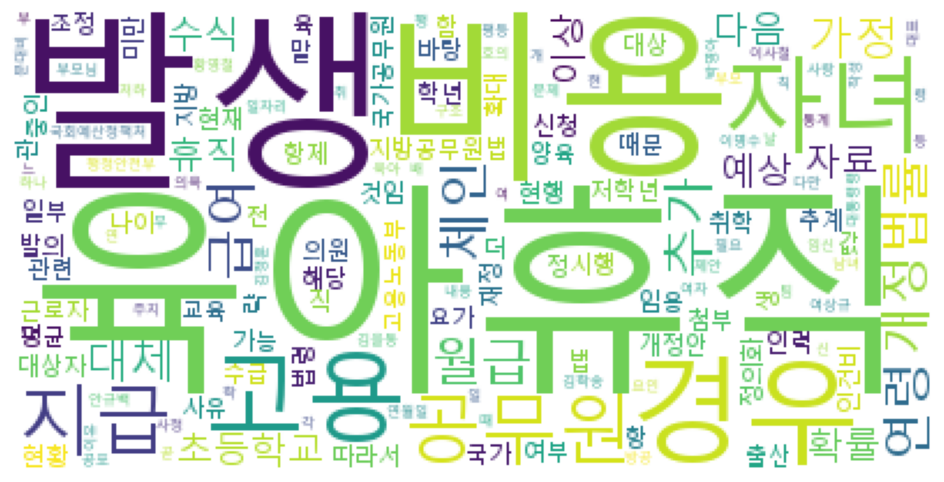

In [40]:
data = ko.vocab().most_common(150)

wordcloud = WordCloud(font_path='c:Windows/Fonts/malgun.ttf',
                     relative_scaling=0.1,
                     background_color='white'
                     ).generate_from_frequencies(dict(data))
plt.figure(figsize=(12,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

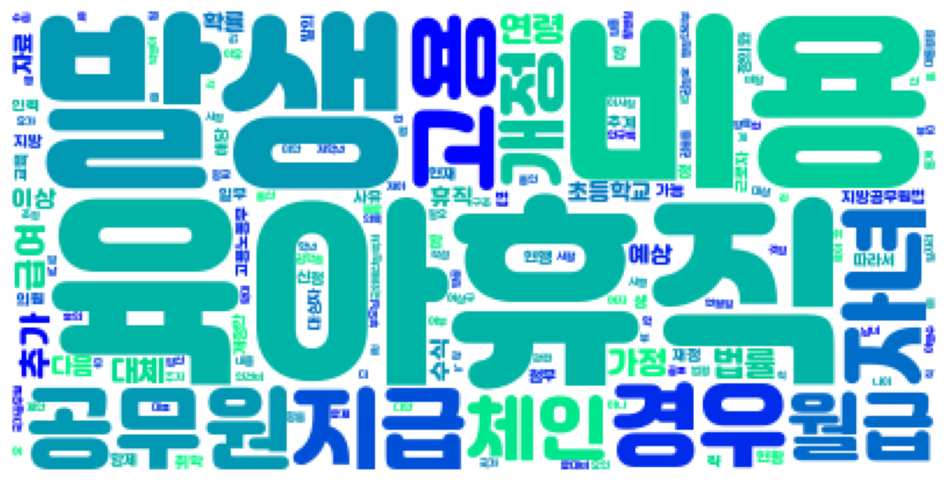

In [41]:
# 잘난체 검색 > 여기어때.잘난체 > ttf download
data = ko.vocab().most_common(150)

wordcloud = WordCloud(font_path='C:/Users/Playdata/Jalnan.ttf',
                     relative_scaling=0.1,
                     background_color='white',
                     colormap='winter' # gist_heat
                     ).generate_from_frequencies(dict(data))
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

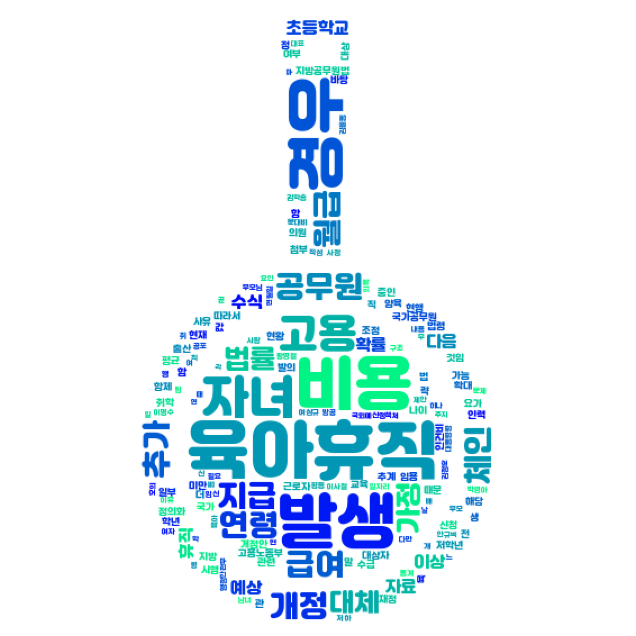

In [42]:
mask1 = np.array(Image.open('../../data/pan.png'))

data = ko.vocab().most_common(150)

wordcloud = WordCloud(font_path='C:/Users/Playdata/Jalnan.ttf',
                     relative_scaling=0.1,
                     background_color='white',
                     colormap='winter', # gist_heat
                     mask=mask1
                     ).generate_from_frequencies(dict(data))
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# 5. Naive Bayes Classifier의 이해 - 영문

In [43]:
from nltk.tokenize import word_tokenize
import nltk

In [44]:
# 지도 학습
train = [('i like you', 'pos'),
        ('i hate you', 'neg'),
        ('you like me', 'neg',
        ('i like her', 'pos'))]

In [45]:
print(train[0][0])
print(word_tokenize(train[0][0]))

i like you
['i', 'like', 'you']


In [46]:
for i in train:
    for j in word_tokenize(i[0]):
        print(j.lower())

i
like
you
i
hate
you
you
like
me


In [47]:
# 말 뭉치
all_words = set(word.lower() for sentence in train
               for word in word_tokenize(sentence[0]))
all_words

{'hate', 'i', 'like', 'me', 'you'}

In [48]:
t = [({word: (word in word_tokenize(x[0])) for word in all_words},  x[1]) for x in train]
t

[({'like': True, 'me': False, 'i': True, 'hate': False, 'you': True}, 'pos'),
 ({'like': False, 'me': False, 'i': True, 'hate': True, 'you': True}, 'neg'),
 ({'like': True, 'me': True, 'i': False, 'hate': False, 'you': True}, 'neg')]

In [49]:
classifier = nltk.NaiveBayesClassifier.train(t)
classifier.show_most_informative_features()

Most Informative Features
                    hate = False             pos : neg    =      1.5 : 1.0
                       i = True              pos : neg    =      1.5 : 1.0
                    like = True              pos : neg    =      1.5 : 1.0
                      me = False             pos : neg    =      1.5 : 1.0
                     you = True              neg : pos    =      1.0 : 1.0


# 6. Naive Bayes Calssifier의 이해 - 한글

In [50]:
from konlpy.tag import Twitter

In [51]:
pos_tagger = Twitter()

In [52]:
train = [('메리가 좋아', 'pos'),
        ('고양이도 좋아', 'pos'),
        ('난 수업이 지루해', 'neg'),
        ('메리는 이쁜 고양이야', 'pos'),
        ('난 마치고 메리랑 놀거야', 'pos'),]

In [53]:
# 말 뭉치
all_words = set(word.lower() for sentence in train
               for word in word_tokenize(sentence[0]))
all_words

{'고양이도',
 '고양이야',
 '난',
 '놀거야',
 '마치고',
 '메리가',
 '메리는',
 '메리랑',
 '수업이',
 '이쁜',
 '좋아',
 '지루해'}

In [54]:
# 말뭉치에 있는지 여부를 나타냄(5개의 훈련 세트)
t= [({word: (word in word_tokenize(x[0])) for word in all_words},  x[1]) for x in train]
t

[({'수업이': False,
   '난': False,
   '고양이도': False,
   '좋아': True,
   '지루해': False,
   '놀거야': False,
   '메리는': False,
   '이쁜': False,
   '고양이야': False,
   '마치고': False,
   '메리랑': False,
   '메리가': True},
  'pos'),
 ({'수업이': False,
   '난': False,
   '고양이도': True,
   '좋아': True,
   '지루해': False,
   '놀거야': False,
   '메리는': False,
   '이쁜': False,
   '고양이야': False,
   '마치고': False,
   '메리랑': False,
   '메리가': False},
  'pos'),
 ({'수업이': True,
   '난': True,
   '고양이도': False,
   '좋아': False,
   '지루해': True,
   '놀거야': False,
   '메리는': False,
   '이쁜': False,
   '고양이야': False,
   '마치고': False,
   '메리랑': False,
   '메리가': False},
  'neg'),
 ({'수업이': False,
   '난': False,
   '고양이도': False,
   '좋아': False,
   '지루해': False,
   '놀거야': False,
   '메리는': True,
   '이쁜': True,
   '고양이야': True,
   '마치고': False,
   '메리랑': False,
   '메리가': False},
  'pos'),
 ({'수업이': False,
   '난': True,
   '고양이도': False,
   '좋아': False,
   '지루해': False,
   '놀거야': True,
   '메리는': False,
   '이쁜': False,
   '고양이야': False,
   '마치고':

In [55]:
classifier = nltk.NaiveBayesClassifier.train(t)
classifier.show_most_informative_features()

Most Informative Features
                       난 = True              neg : pos    =      2.5 : 1.0
                      좋아 = False             neg : pos    =      1.5 : 1.0
                    고양이도 = False             neg : pos    =      1.1 : 1.0
                    고양이야 = False             neg : pos    =      1.1 : 1.0
                     놀거야 = False             neg : pos    =      1.1 : 1.0
                     마치고 = False             neg : pos    =      1.1 : 1.0
                     메리가 = False             neg : pos    =      1.1 : 1.0
                     메리는 = False             neg : pos    =      1.1 : 1.0
                     메리랑 = False             neg : pos    =      1.1 : 1.0
                      이쁜 = False             neg : pos    =      1.1 : 1.0


In [56]:
test_sentense = '난 수업이 마치면 메리랑 놀거야'

In [57]:
test_sent_feature = {word.lower():
                        (word in word_tokenize(test_sentense.lower()))
                            for word in all_words}
test_sent_feature

{'수업이': True,
 '난': True,
 '고양이도': False,
 '좋아': False,
 '지루해': False,
 '놀거야': True,
 '메리는': False,
 '이쁜': False,
 '고양이야': False,
 '마치고': False,
 '메리랑': True,
 '메리가': False}

In [58]:
from konlpy.tag import Twitter
twitter = Twitter()
print(twitter.pos('이것도 재미 있습니당ㅋㅋ'))
print('--------------------------------------------------------------------')
print(twitter.pos('이것도 재미 있습니당ㅋㅋ', norm=True))
print('--------------------------------------------------------------------')
print(twitter.pos('이것도 재미 있습니당ㅋㅋ', norm=True, stem=True))

[('이', 'Determiner'), ('것', 'Noun'), ('도', 'Josa'), ('재미', 'Noun'), ('있', 'Adjective'), ('습', 'Noun'), ('니당', 'Verb'), ('ㅋㅋ', 'KoreanParticle')]
--------------------------------------------------------------------
[('이', 'Determiner'), ('것', 'Noun'), ('도', 'Josa'), ('재미', 'Noun'), ('있습니다', 'Adjective'), ('ㅋㅋ', 'KoreanParticle')]
--------------------------------------------------------------------
[('이', 'Determiner'), ('것', 'Noun'), ('도', 'Josa'), ('재미', 'Noun'), ('있다', 'Adjective'), ('ㅋㅋ', 'KoreanParticle')]


In [59]:
# stem=True : 원형, norm=True : 정규화
def tokenize(doc):
    return ['/'.join(t) for t in pos_tagger.pos(doc, norm=True, stem=True)]

In [60]:
for row in train:
    print(tokenize(row[0]))

['메리/Noun', '가/Josa', '좋다/Adjective']
['고양이/Noun', '도/Josa', '좋다/Adjective']
['난/Noun', '수업/Noun', '이/Josa', '지루하다/Adjective']
['메리/Noun', '는/Josa', '이쁘다/Adjective', '고양이/Noun', '야/Josa']
['난/Noun', '마치/Noun', '고/Josa', '메리/Noun', '랑/Josa', '놀다/Verb']


In [61]:
train_docs = [(tokenize(row[0]), row[1]) for row in train]
train_docs

[(['메리/Noun', '가/Josa', '좋다/Adjective'], 'pos'),
 (['고양이/Noun', '도/Josa', '좋다/Adjective'], 'pos'),
 (['난/Noun', '수업/Noun', '이/Josa', '지루하다/Adjective'], 'neg'),
 (['메리/Noun', '는/Josa', '이쁘다/Adjective', '고양이/Noun', '야/Josa'], 'pos'),
 (['난/Noun', '마치/Noun', '고/Josa', '메리/Noun', '랑/Josa', '놀다/Verb'], 'pos')]

In [62]:
tokens = [t for d in train_docs for t in d[0]]
tokens

['메리/Noun',
 '가/Josa',
 '좋다/Adjective',
 '고양이/Noun',
 '도/Josa',
 '좋다/Adjective',
 '난/Noun',
 '수업/Noun',
 '이/Josa',
 '지루하다/Adjective',
 '메리/Noun',
 '는/Josa',
 '이쁘다/Adjective',
 '고양이/Noun',
 '야/Josa',
 '난/Noun',
 '마치/Noun',
 '고/Josa',
 '메리/Noun',
 '랑/Josa',
 '놀다/Verb']

In [63]:
def term_exists(doc):
    return {word: (word in set(doc)) for word in tokens}

In [64]:
for d, c in train_docs:
    print(d, c)

['메리/Noun', '가/Josa', '좋다/Adjective'] pos
['고양이/Noun', '도/Josa', '좋다/Adjective'] pos
['난/Noun', '수업/Noun', '이/Josa', '지루하다/Adjective'] neg
['메리/Noun', '는/Josa', '이쁘다/Adjective', '고양이/Noun', '야/Josa'] pos
['난/Noun', '마치/Noun', '고/Josa', '메리/Noun', '랑/Josa', '놀다/Verb'] pos


In [65]:
# '메리가 좋아', '고양이도 좋아'
# 토큰라이징한 후 문장이 말뭉치에 있는지 확인
train_xy = [(term_exists(d), c) for d,c in train_docs]
train_xy

[({'메리/Noun': True,
   '가/Josa': True,
   '좋다/Adjective': True,
   '고양이/Noun': False,
   '도/Josa': False,
   '난/Noun': False,
   '수업/Noun': False,
   '이/Josa': False,
   '지루하다/Adjective': False,
   '는/Josa': False,
   '이쁘다/Adjective': False,
   '야/Josa': False,
   '마치/Noun': False,
   '고/Josa': False,
   '랑/Josa': False,
   '놀다/Verb': False},
  'pos'),
 ({'메리/Noun': False,
   '가/Josa': False,
   '좋다/Adjective': True,
   '고양이/Noun': True,
   '도/Josa': True,
   '난/Noun': False,
   '수업/Noun': False,
   '이/Josa': False,
   '지루하다/Adjective': False,
   '는/Josa': False,
   '이쁘다/Adjective': False,
   '야/Josa': False,
   '마치/Noun': False,
   '고/Josa': False,
   '랑/Josa': False,
   '놀다/Verb': False},
  'pos'),
 ({'메리/Noun': False,
   '가/Josa': False,
   '좋다/Adjective': False,
   '고양이/Noun': False,
   '도/Josa': False,
   '난/Noun': True,
   '수업/Noun': True,
   '이/Josa': True,
   '지루하다/Adjective': True,
   '는/Josa': False,
   '이쁘다/Adjective': False,
   '야/Josa': False,
   '마치/Noun': False,
   '고/Jo

In [66]:
classifier = nltk.NaiveBayesClassifier.train(train_xy)

In [67]:
test_sentense = [('난 수업이 마치면 메리랑 놀거야')]

In [68]:
test_docs = pos_tagger.pos(test_sentense[0])
test_docs

[('난', 'Noun'),
 ('수업', 'Noun'),
 ('이', 'Josa'),
 ('마치', 'Noun'),
 ('면', 'Josa'),
 ('메리', 'Noun'),
 ('랑', 'Josa'),
 ('놀거야', 'Verb')]

In [69]:
test_sent_features = {word: (word in tokens) for word in test_docs}
test_sent_features

{('난', 'Noun'): False,
 ('수업', 'Noun'): False,
 ('이', 'Josa'): False,
 ('마치', 'Noun'): False,
 ('면', 'Josa'): False,
 ('메리', 'Noun'): False,
 ('랑', 'Josa'): False,
 ('놀거야', 'Verb'): False}

In [70]:
classifier.classify(test_sent_features)

'pos'